# Bigram frequency visualization

In [1]:
import torch 

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas import DataFrame

from tqdm import tqdm 

from matplotlib.pyplot import figure
import matplotlib as mpl

from nltk.corpus import stopwords

In [14]:
stopwords = stopwords.words('english')
stopwords.extend(['"', "'", '.', ',', '?', '!', '-', '[CLS]', '[SEP]', 
      ':', '@', '/', '[', ']', '(', ')', 'would', 'like'])
stopwords = set(stopwords)

In [39]:
last_bigram_path = 'bertnet_0.0.6.4_dev_epoch_-1_state_2gram_both.txt'
zero_bigram_path = 'bertnet_0.1.9.1_dev_epoch_-1_state_2gram_both.txt'

In [22]:
def read_bigram(bigram_path):
    bigrams = []
    lines = open(bigram_path).readlines()
    bigram = []
    for li, l in enumerate(lines):
        if(li % 3 == 0):
            l_ = l.split(' ')
            bigram.extend([l_[2], int(l_[4])])
        if(li % 3 == 1):
            l_ = l[:-2].split(' | ')
            cnt_ = 0
            for bi_ in l_[1:]:
                bi_ = bi_.split(' ')
                w1 = bi_[0].split('-')[0]
                w2 = bi_[0].split('-')[1]
                cnt = int(bi_[1])
                if(w1 in stopwords or w2 in stopwords):
                    cnt_ += cnt
            bigram.append(cnt_)
            bigrams.append(bigram)
            bigram = []
    return bigrams

In [40]:
last_bigrams = read_bigram(last_bigram_path)
zero_bigrams = read_bigram(zero_bigram_path)

In [38]:
len(last_bigrams)

93263

In [41]:
len(zero_bigrams)

136523

In [37]:
last_bigrams[3]

['1792-357', 477, 3]

In [67]:
def plot_bigram(bigrams, interval=10, maxy=5, end_idx=-1):
    bigrams_x = []
    bigrams_y_sw = []
    bigrams_y_nsw = []

    for bi, b in enumerate(bigrams):
        if(bi % interval == 0):
            bigrams_x.append(bi // interval)
            r = b[2] / float(b[1])
            base = np.log(b[1] + 1)
            if(base > maxy): base=maxy
            bigrams_y_sw.append(base * r)
            bigrams_y_nsw.append(base * (1 - r))
    fig = plt.figure(figsize=(6, 2.5), dpi=200)
    plt.bar(x=bigrams_x[:end_idx], height=bigrams_y_sw[:end_idx], color='tab:orange')
    plt.bar(x=bigrams_x[:end_idx], height=bigrams_y_nsw[:end_idx], bottom=bigrams_y_sw[:end_idx], color='tab:blue')
    return 

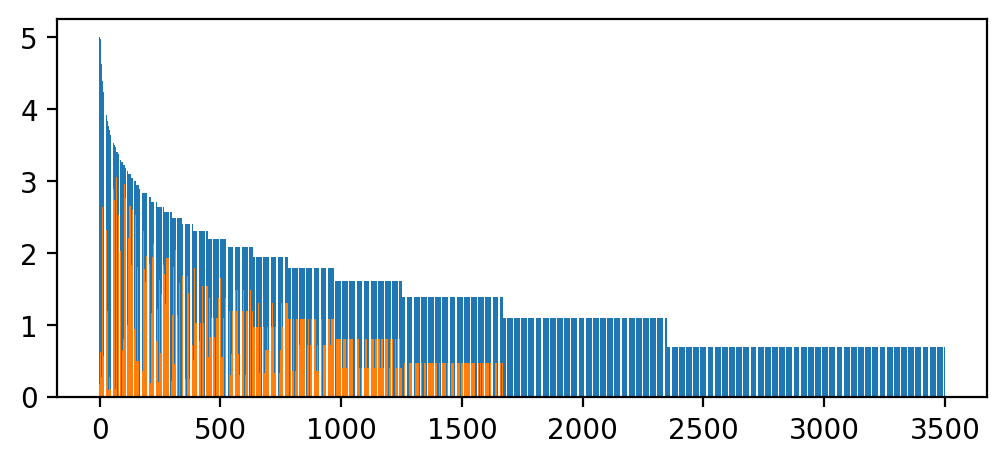

In [70]:
plot_bigram(last_bigrams, interval=25, end_idx=3500)

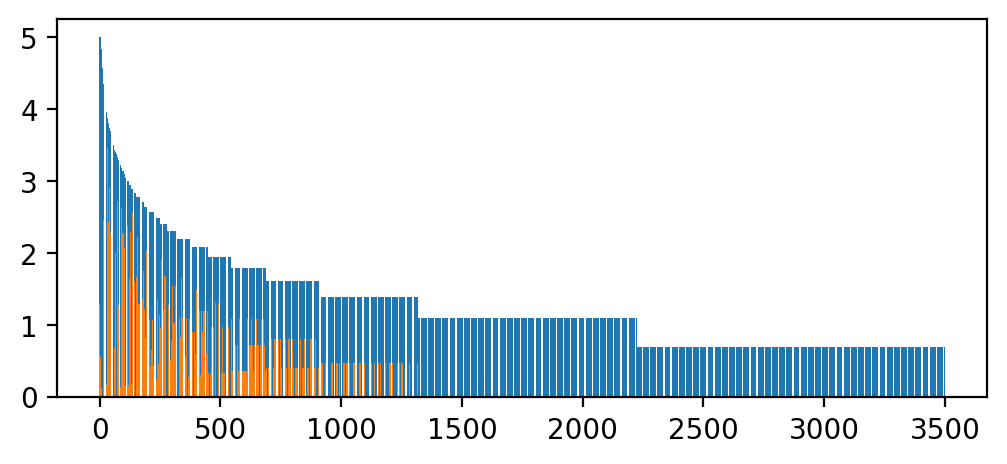

In [69]:
plot_bigram(zero_bigrams, interval=25, end_idx=3500)

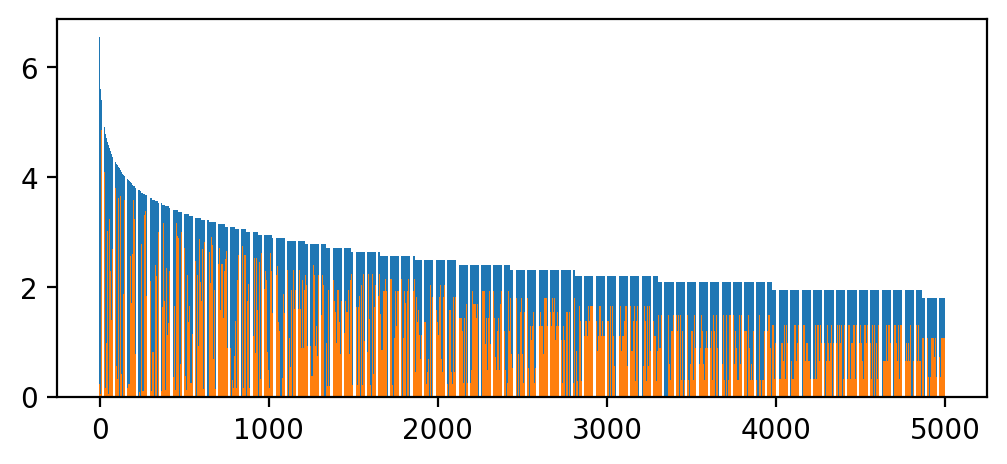

In [78]:
plot_bigram(last_bigrams[:20000], interval=4, maxy=100)

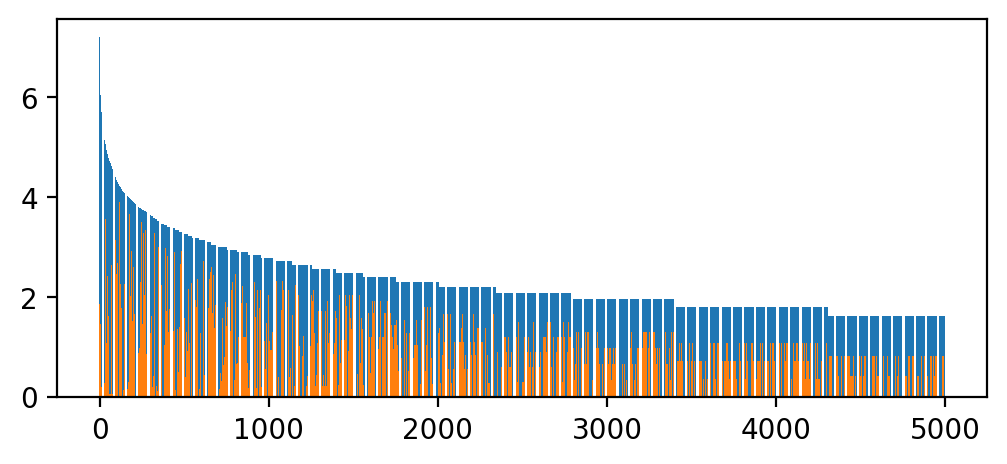

In [79]:
plot_bigram(zero_bigrams[:20000], interval=4, maxy=100)